In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage

In [11]:
df = pd.read_csv('./sales_data_sample.csv', encoding = 'latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [17]:
# Select only numerical columns for clustering
df = df.select_dtypes(include=['number']).copy()

In [22]:
df.dropna(inplace=True)

In [24]:
scaler= StandardScaler()
scaled_data = scaler.fit_transform(df)

In [26]:
wcss = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters = k, random_state=42, n_init=10)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

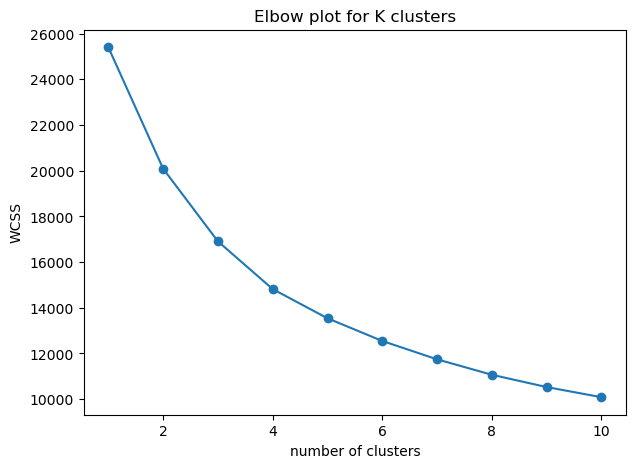

In [28]:
plt.figure(figsize=(7,5))
plt.plot(K,wcss,marker='o')
plt.title("Elbow plot for K clusters")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [30]:
k=3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
df['clusters']=clusters
print(df.head(8))
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  \
0        10107               30      95.70                2  2871.00       1   
1        10121               34      81.35                5  2765.90       2   
2        10134               41      94.74                2  3884.34       3   
3        10145               45      83.26                6  3746.70       3   
4        10159               49     100.00               14  5205.27       4   
5        10168               36      96.66                1  3479.76       4   
6        10180               29      86.13                9  2497.77       4   
7        10188               48     100.00                1  5512.32       4   

   MONTH_ID  YEAR_ID  MSRP  clusters  
0         2     2003    95         1  
1         5     2003    95         2  
2         7     2003    95         1  
3         8     2003    95         1  
4        10     2003    95         1  
5        10     2003    95         1  
6     

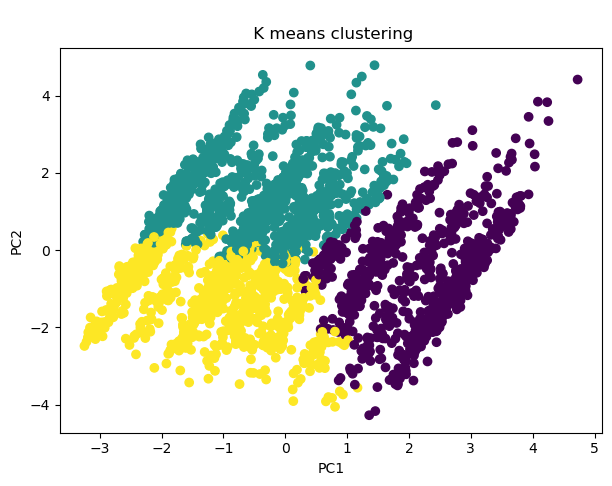

In [32]:
plt.figure(figsize=(7,5))
plt.scatter(pca_data[:,0],pca_data[:,1],c=clusters)
plt.title("\n K means clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

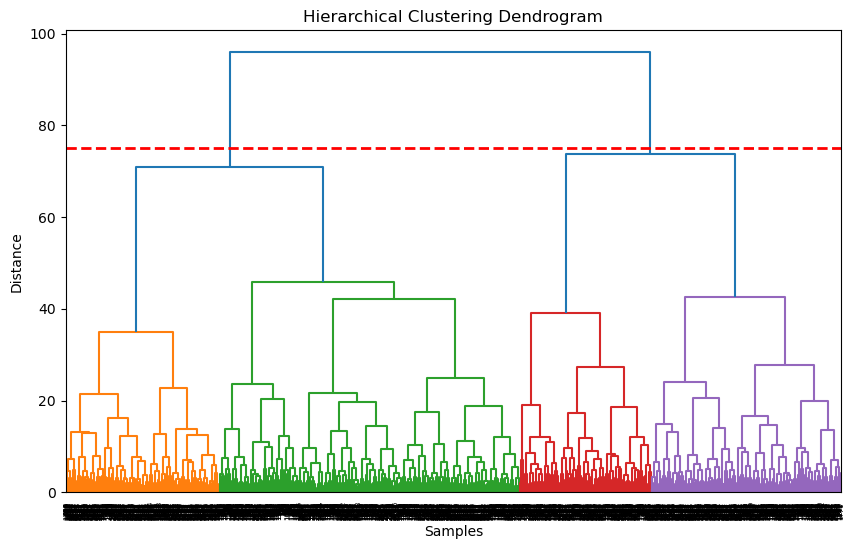

In [34]:
linked=linkage(scaled_data,method="ward")

plt.figure(figsize=(10,6))
dendrogram(linked)
plt.axhline(y=75,color="red",linestyle="--",linewidth=2)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()